In [192]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [193]:
img = cv2.imread('./test/ronda.jpg')
img.shape

(512, 768, 3)

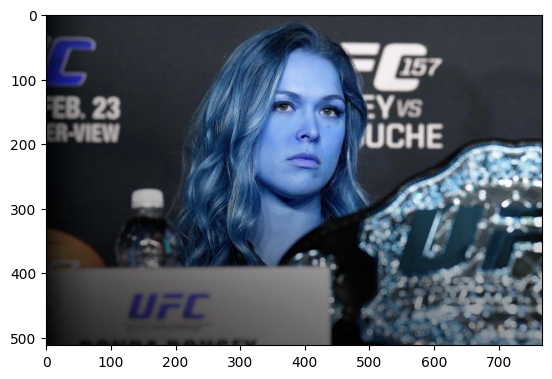

In [194]:
plt.imshow(img)

In [195]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(512, 768)

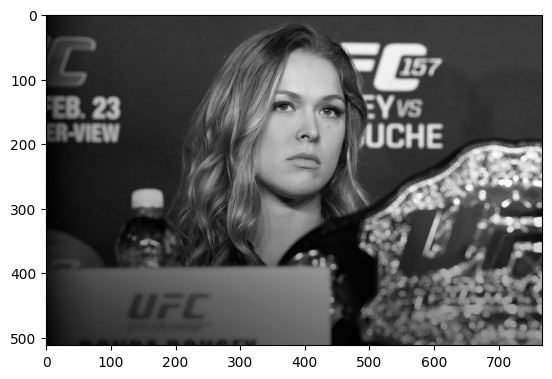

In [196]:
plt.imshow(gray,cmap='gray')

In [197]:
face_cascade= cv2.CascadeClassifier('./opencv/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('./opencv/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[321,  82, 168, 168]])

In [198]:
(x,y,w,h) = faces[0]
x,y,w,h

(321, 82, 168, 168)

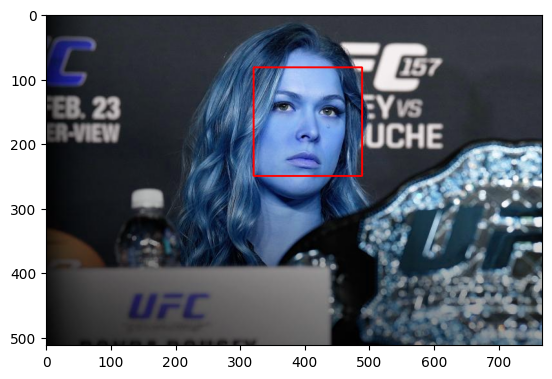

In [199]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

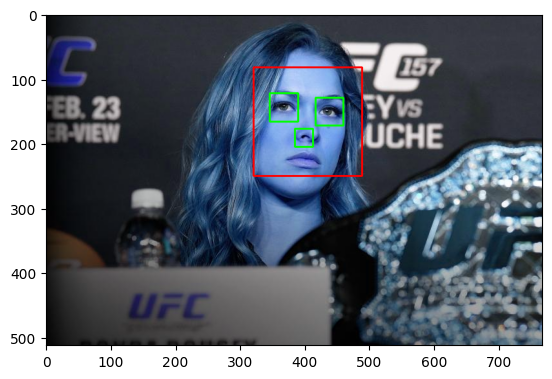

In [200]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

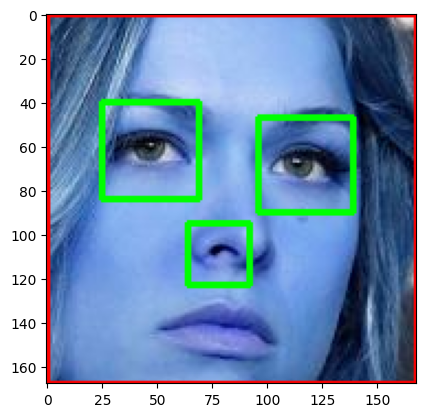

In [201]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [202]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

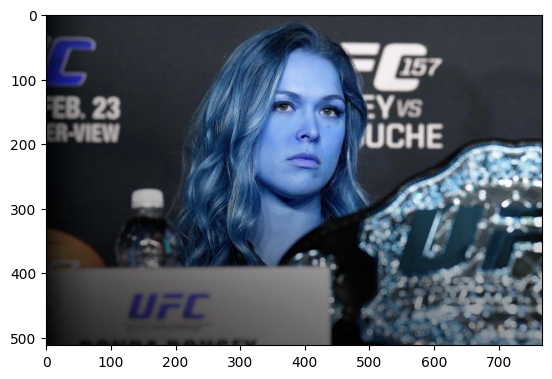

In [203]:

original_img = cv2.imread('./test/ronda.jpg')
plt.imshow(original_img)


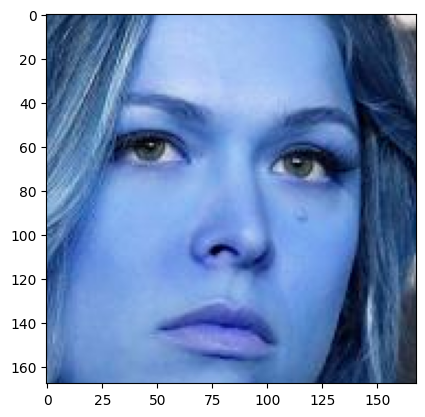

In [204]:


cropped_img = get_cropped_imageIf_2_eyes('./test/ronda.jpg')
plt.imshow(cropped_img)


In [205]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [206]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [207]:
img_dirs

['./dataset/cropped',
 './dataset/john_cena',
 './dataset/ronaldo',
 './dataset/ronda_rousey',
 './dataset/The_rock',
 './dataset/virat_kohli']

In [208]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [209]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".jpg"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    


cropped
john_cena
Generating cropped images in folder:  ./dataset/cropped/john_cena
ronaldo
Generating cropped images in folder:  ./dataset/cropped/ronaldo
ronda_rousey
Generating cropped images in folder:  ./dataset/cropped/ronda_rousey
The_rock
Generating cropped images in folder:  ./dataset/cropped/The_rock
virat_kohli
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


In [212]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H


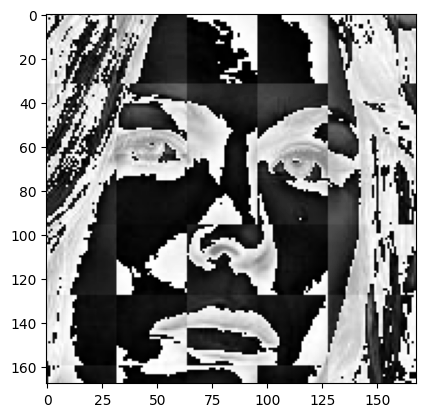

In [213]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')